# WEEK 5

Firstly importing the required libraries

In [1]:
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

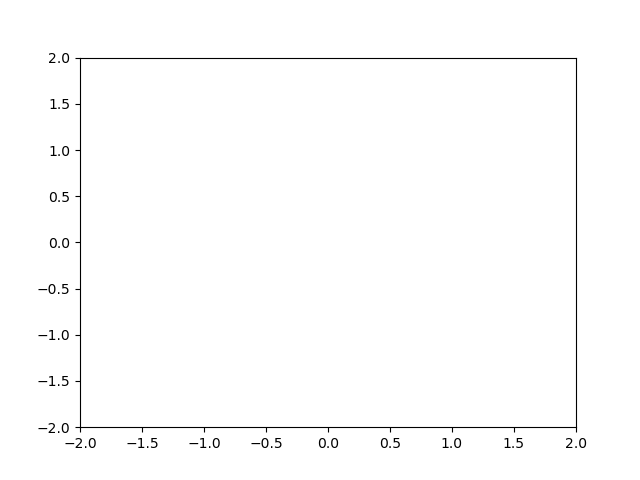

In [2]:
#Here we are closing any plots if they are open
plt.close()

#Here we are defining some of the required variables
fig = plt.figure()
ax= plt.axes(xlim= (-2,2), ylim= (-2,2))
xdata, ydata = [], []
ln, = ax.plot([], [], lw=2)

#this will initial the ln coordinates
def init():
    ln.set_data([],[])
    return ln,


# Tributary Functions

---


The following function <b>morph</b> will return a point between between two points (x1,y1) and (x2,y2). Here alpha is the weight factor and f is the scalling factor. Thus depending on 'alpha' and 'f' the location of the returning point will be set. 

In [3]:
def morph(x1, y1, x2, y2, alpha,f):
    xm = alpha * x1 + (f-alpha) * x2
    xm= xm/f
    ym = alpha * y1 + (f-alpha) * y2
    ym= ym/f
    return xm, ym

There are two functions in the following cell:

-   <b>polygonN:</b> This funciton will return abscissas and ordinates of n sided polynomial with (1,0) as one of its point.
-   <b>returnshapes:</b> This function will use the above function 'polygonN' in order to return a set of shapes begining from 3 to the number n  

In [4]:
def polygonN(n):
    abscissa = []
    ordinate = []

    #including (1,0) as one of it's point
    abscissa.append(1)
    ordinate.append(0)

    angle = np.pi*2/n
    for i in range (1,n):
        x = np.cos(angle*i)
        y = np.sin(angle*i)
        abscissa.append(x)
        ordinate.append(y)
    #again including this point so
    #that when plot is made, the final line joining to the initial point is made
    abscissa.append(1)
    ordinate.append(0)
    return abscissa, ordinate 

def returnshapes(n):
    coordinates=[]
    for i in range(3,n):
        x,y= polygonN(i)
        coordinates.append([x,y])
    return coordinates

In [5]:
#here I am defining a variable name shapes and it contains shapes starting
#from triangle to octagon as shown in the video 
shapes = returnshapes(8)

# Main Function

---
The following class is the main code of the Assignment. So what this class 'ShapeAnimate' does is, it works as a function to return points that are required for the annimation. So each and every edge that will be there in the animation will be generated here.

So how it works is that:

Say there are two consecutive shapes triangle and square, and we need to morph between them. Firstly I will generate an intermediate shape, and animate the eddges of the intermediate shape to match the first and the second shape.  

In [6]:
class ShapeAnimate():
    def __init__(self,shapes, num_of_shapes,frmes_btn_shapes):
        self.shapes =shapes
        self.num_of_shapes= num_of_shapes
        self.frmes_btn_shapes= frmes_btn_shapes
        
    def intermediate_shape1(self,shape_no,points):
        req_shape= []
        #taking the coodinates of the shape
        y= points[shape_no -3][1]
        x= points[shape_no -3][0]
        for j in range(len(points[shape_no-3][0])-1):
            #it will select one line of the first shape
            m1= (y[j]- y[j+1])/(x[j]- x[j+1]) #slope of the edge
            c1= y[j] - m1*x[j] #intercepting const

            #it will make a line from orgin to the angle of second shape
            m2= points[shape_no-2][1][j+1]/ points[shape_no-2][0][j+1]
            
            #making two equation
            coeffmat= np.array([[-m1,1],[-m2,1]])
            const_vector= np.array([c1,0])

            #the position is the solution of the two equations
            position= np.linalg.solve(coeffmat,
                                        const_vector)
            
            #finally appening all the postions to make a shape
            req_shape.append(position)
        return req_shape

    def intermediate_shape2(self,shape_no, shapes):
        req_shape=[]
        for j in range(len(shapes[shape_no-3][0])-2):

            #here nameing the variable to understand the the next codes 
            #easier.
            nextshape_y1= shapes[shape_no-2][1][j+1]
            nextshape_y2= shapes[shape_no-2][1][j+2] 
            nextshape_x1= shapes[shape_no-2][0][j+1]
            nextshape_x2= shapes[shape_no-2][0][j+2] 

            shape_y= shapes[shape_no-3][1][j+1]
            shape_x= shapes[shape_no-3][0][j+1]


            slope1= (nextshape_y1-nextshape_y2)/(nextshape_x1-nextshape_x2)
            intercept1= nextshape_y1 - slope1*nextshape_x1

            slope2= shape_y/shape_x
            #making the equations out of the calculated slopes and const
            coeffmat= np.array([[-slope1,1],[-slope2,1]])
            const_vector= np.array([intercept1,0])

            #finding solution to the two eq
            position= np.linalg.solve(coeffmat,const_vector)

            #ammending all the positons to make a shape
            req_shape.append(position)
        return req_shape


    def animatedpoints(self):
        #naming of framepoint is such that, it contains the points of each frame
        #of the simulation
        framepoints=[]
        
        #iterating through each frame
        for i in range(3, self.num_of_shapes+2):
            
            framepoints.append([])
            x= shapes[i-3][0]
            y= shapes[i-3][1]
            framepoints[(i-3)*self.frmes_btn_shapes].append(x)
            framepoints[(i-3)*self.frmes_btn_shapes].append(y)
            
            next_shape=[]
            same_shape=[]

            next_shape= self.intermediate_shape1(i, self.shapes)
            same_shape= self.intermediate_shape2(i, self.shapes)

            for j in range(1, self.frmes_btn_shapes):
                framepoints.append([])
                xpoints=[1]
                ypoints=[0]
                #here the code will make the edge of the intermiadiate shape
                #morph from one shape to another slowly and will add each of
                #the intermediate shape to framepoints
                for k in range(len(x)-1):
                    #morphing between two points
                    X,Y= morph(
                                self.shapes[i-2][0][k+1],
                                self.shapes[i-2][1][k+1],
                                next_shape[k][0], 
                                next_shape[k][1],
                                j,
                                self.frmes_btn_shapes
                                )
                
                    xpoints.append(X)
                    ypoints.append(Y)

                    #morphing between two points
                    #giving this if condition because at k= len(x)-2 there
                    #will be one more same element +1.
                    if(k!= len(x)-2):
                        X,Y= morph(
                                    same_shape[k][0], 
                                    same_shape[k][1],
                                    shapes[i-3][0][k+1],
                                    shapes[i-3][1][k+1],
                                    j,
                                    self.frmes_btn_shapes
                                    )
                        xpoints.append(X)
                        ypoints.append(Y)
                
                xpoints.append(1)
                ypoints.append(0)

                framepoints[(i-3)*self.frmes_btn_shapes +j].append(xpoints)
                framepoints[(i-3)*self.frmes_btn_shapes +j].append(ypoints)
        l= len(framepoints)
        #finally reversing all the transition from traingle to octagon and 
        #coming back to the triangle
        for i in reversed(range(l)):
            framepoints.append(framepoints[i])
        return framepoints
    

In [7]:
#making animator the required class giving the set of shapes we found in
#"shapes", lenght of shapes, and number of intermediate shapes between two
#shapes
animator= ShapeAnimate(shapes,len(shapes),20)

#in framepoints we are storing all the animation
framepoints= animator.animatedpoints()

# Update function
---
This function will take the $i^{th}$ element of the framepoint, and update the ln in the plot

In [8]:
def update(i):
    ln.set_data(framepoints[i][0], framepoints[i][1])
    return ln,

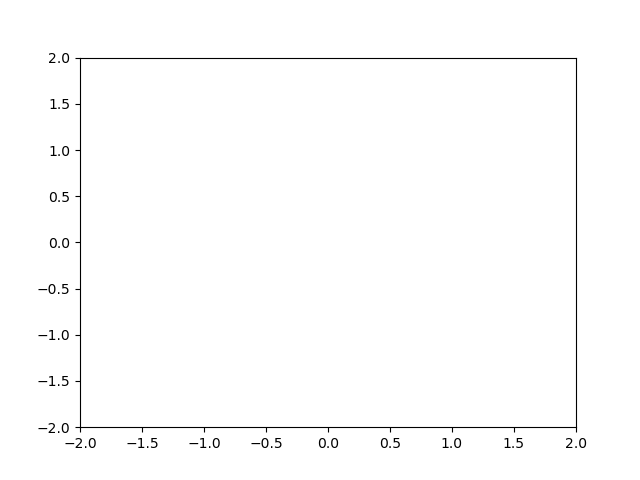

In [9]:
#calling the FuncAnimation and inserting all the requred variables it needs
anim = FuncAnimation(fig,update,
                     init_func=init,
                     frames = 242,
                     interval = 100,
                     blit = False,
                     repeat = True)
plt.show()